In [9]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as random_gauss
from scipy.stats import multivariate_normal
from scipy import random, linalg

[[ 0.11231111  0.23890589]
 [ 0.23890589  0.5147742 ]]
[[ 0.97282087  0.93476269]
 [ 0.93476269  0.90823517]]
[[ 0.7561163   0.31275287]
 [ 0.31275287  0.21742611]]
[[ 0.00071973  0.00167878]
 [ 0.00167878  0.00393761]]
[[ 0.39757289  0.40516674]
 [ 0.40516674  0.41962521]]
[[ 1.07328931  0.48116323]
 [ 0.48116323  0.231775  ]]
[[  1.23259516e-32  -2.46519033e-32]
 [ -2.46519033e-32   4.93038066e-32]]


LinAlgError: singular matrix

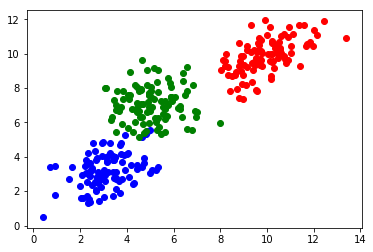

In [66]:
x = []
y = []
distributions = []
colors = ["red", "blue", "green"]
covs = [
    [[1, 0.5], [0.5,  1]],
    [[1, 0.3], [0.3,  1]],
    [[1, 0], [0,  1]]
]
for (x, y), cov in zip([(10, 10), (3, 3), (5, 7)], covs):
    distributions.append(random_gauss((x, y), cov, 100))

for d, c in zip(distributions, colors):
    plt.scatter(d[:,0], d[:,1], color=c)
    
phi = [1/3] * 3
mu = [(0, 0), (0.7, 1), (1, 0.5)] #TODO: actual random data

sigma = []
for _ in range(len(phi)):
    random_matrix = random.rand(2, 2)
    sigma.append(np.dot(random_matrix, random_matrix.transpose()))

samples = np.concatenate(distributions)

weights = np.zeros((len(phi), len(samples)))
for _ in range(100):
    # e-step
    for j in range(len(phi)):
        print(sigma[j])
        rv = multivariate_normal(mu[j], sigma[j])
        for i in range(len(samples)):
            weights[j][i] = rv.pdf(samples[i])
    # m-step
    for j in range(len(phi)):
        phi[j] = np.average(weights[j])
        mu[j] = sum(np.multiply(weights[j], samples.T).T)/sum(weights[j]) 
        s = np.zeros((2, 2))
        for i in range(len(samples)):
            x = samples[i]
            s += weights[j][i] * (np.mat(x - mu[j]).T * np.mat(x - mu[j]))
        s = s / sum(weights[j])
        sigma[j] = s
        
    